# Udemy Course Analysis

**Datset used [Udemy Datset](https://www.kaggle.com/andrewmvd/udemy-courses)**

### Importing the necessary packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

### Reading the dataset

In [5]:
df_udemy = pd.read_csv(r'./udemy_courses.csv',index_col = 0)

In [6]:
df_udemy.describe()

,num_subscribers,num_reviews,num_lectures
count,3683.000000,3683.000000,3683.000000
mean,3193.371165,156.448004,40.062178
std,9498.231406,935.078241,50.366788
min,0.000000,0.000000,0.000000
25%,110.000000,4.000000,15.000000
50%,911.000000,18.000000,25.000000
75%,2537.500000,67.000000,45.000000
max,268923.000000,27445.000000,779.000000


In [7]:
df_udemy.shape

(3683, 11)

In [8]:
df_udemy.columns

Index(['course_title', 'url', 'is_paid', 'price', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [9]:
df_udemy.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


### Data cleaning and preprocessing

In [10]:
df_udemy.isnull().sum()

course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [11]:
df_udemy.select_dtypes('object').columns

Index(['course_title', 'url', 'is_paid', 'price', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [12]:
df_udemy.drop(index=96698,axis=0,inplace=True)

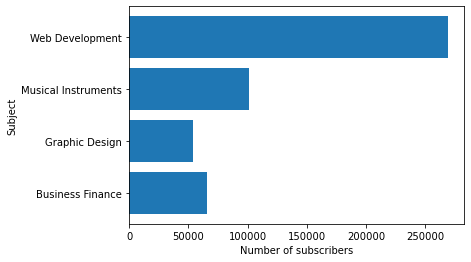

In [13]:
plt.barh(df_udemy['subject'],df_udemy['num_subscribers'])
plt.xlabel('Number of subscribers')
plt.ylabel('Subject')
plt.show()

## 1. Which course overall has the maximum number of enrollments?

In [14]:
overall_max_enrolled_course = df_udemy['num_subscribers'].max()
overall_max_enrolled_course

268923

In [15]:
df_udemy[df_udemy['num_subscribers']==overall_max_enrolled_course]

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development


##### From the analysis, it is clear that "Learn HTML5 Programming from Scratch" is the highly enrolled course with 268932 subscribers in Udemy based on these 4 domains.

## 2. Which courses overall has the minimum subscribers/ minimum number of enrollment?

In [16]:
overall_min_enrolled_courses = df_udemy['num_subscribers'].min()
df_min = df_udemy[df_udemy['num_subscribers']==overall_min_enrolled_courses]
df_min

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,37 mins,2016-05-16T18:28:30Z,Business Finance
1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.5 hours,2017-04-23T16:19:01Z,Business Finance
1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.5 hours,2017-07-06T21:46:30Z,Business Finance
1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2 hours,2017-07-03T21:40:32Z,Business Finance
1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2 hours,2017-06-29T22:01:56Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
1214670,Tune that Sour Note on Your Piano,https://www.udemy.com/how-to-tune-your-own-piano/,TRUE,20,0,0,6,All Levels,33 mins,2017-06-20T21:46:40Z,Musical Instruments
1272282,Learn Vikings Soundtracks on the Piano by Ear,https://www.udemy.com/learn-vikings-soundtrack...,TRUE,20,0,0,8,All Levels,35 mins,2017-06-29T15:10:58Z,Musical Instruments
1224186,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,TRUE,35,0,0,13,Beginner Level,31 mins,2017-05-30T00:19:02Z,Musical Instruments


In [17]:
df_min.shape

(70, 11)

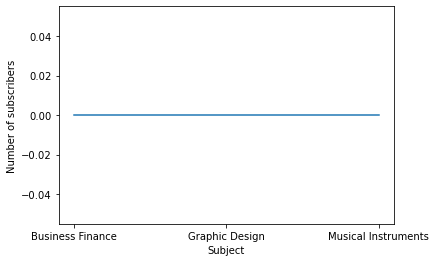

In [18]:
plt.plot(df_min['subject'],df_min['num_subscribers'])
plt.ylabel('Number of subscribers')
plt.xlabel('Subject')
plt.show()

##### It is clear that 70 of 3683 courses are not enrolled by any number of subscribers. The number of subscribers is 0 in the case.

## 3. Which of the paid courses is maximum enrolled?

In [19]:
features_paid = (df_udemy['is_paid'] == 'True') | (df_udemy['is_paid']=='TRUE')
df_paid = df_udemy[features_paid]
df_paid.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [20]:
df_paid.shape

(3372, 11)

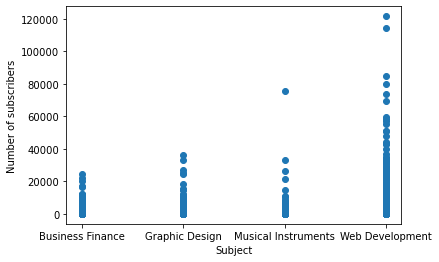

In [21]:
plt.scatter(df_paid['subject'],df_paid['num_subscribers'])
plt.ylabel('Number of subscribers')
plt.xlabel('Subject')
plt.show()

In [22]:
max_enrolled_in_paid_courses = df_paid['num_subscribers'].max()
max_enrolled_in_paid_courses

121584

In [23]:
df_paid[df_paid['num_subscribers']==max_enrolled_in_paid_courses]

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development


##### There are 3372 paid courses in this dataset. Out of those, the most enrolled paid course, as of analysis, is "The Web Developer Bootcamp" where 121584 users have enrolled in this course which has 43 hours of duration with price 200

## 4. Which paid courses are minimum enrolled?

In [24]:
min_enrolled_in_paid_courses = df_paid['num_subscribers'].min()
min_enrolled_in_paid_courses

0

In [25]:
min_paid_courses = df_paid[df_paid['num_subscribers']==min_enrolled_in_paid_courses]
min_paid_courses

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
837322,Essentials of money value: Get a financial Life !,https://www.udemy.com/essentials-of-money-value/,True,20,0,0,20,All Levels,37 mins,2016-05-16T18:28:30Z,Business Finance
1157298,Introduction to Forex Trading Business For Beg...,https://www.udemy.com/introduction-to-forex-tr...,True,20,0,0,27,Beginner Level,1.5 hours,2017-04-23T16:19:01Z,Business Finance
1282064,Cryptocurrency (BTC & ETH) Investment & Tradin...,https://www.udemy.com/cryptocurrency-btc-eth-i...,True,20,0,0,7,Beginner Level,2.5 hours,2017-07-06T21:46:30Z,Business Finance
1247992,Introduction to Project Management for Finance...,https://www.udemy.com/introduction-to-project-...,True,50,0,0,9,Beginner Level,2 hours,2017-07-03T21:40:32Z,Business Finance
1251582,Best Practices in Corporate Budgeting,https://www.udemy.com/best-practices-corporate...,True,50,0,0,9,Intermediate Level,2 hours,2017-06-29T22:01:56Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...
1214670,Tune that Sour Note on Your Piano,https://www.udemy.com/how-to-tune-your-own-piano/,TRUE,20,0,0,6,All Levels,33 mins,2017-06-20T21:46:40Z,Musical Instruments
1272282,Learn Vikings Soundtracks on the Piano by Ear,https://www.udemy.com/learn-vikings-soundtrack...,TRUE,20,0,0,8,All Levels,35 mins,2017-06-29T15:10:58Z,Musical Instruments
1224186,Learn to Play Piano Like a Pro - Easy Piano Co...,https://www.udemy.com/learn-to-play-piano-like...,TRUE,35,0,0,13,Beginner Level,31 mins,2017-05-30T00:19:02Z,Musical Instruments


In [26]:
min_paid_courses.shape

(70, 11)

##### There are 70 paid courses which are minimally enrolled. Here, the number of subscribers are 0 i.e. there are no subscribers for these 70 courses.

## 5. Which of the free courses are max enrolled?

In [27]:
features_free = (df_udemy['is_paid'] == 'False') | (df_udemy['is_paid']=='FALSE')
df_free = df_udemy[features_free]
df_free.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
1148774,Options Trading 101: The Basics,https://www.udemy.com/options-trading-101-the-...,False,Free,1514,66,11,Beginner Level,33 mins,2017-03-23T22:19:57Z,Business Finance
133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,False,Free,50855,2698,15,Beginner Level,1.5 hours,2013-12-25T19:53:34Z,Business Finance
265960,Fundamentals of Forex Trading,https://www.udemy.com/fundamentals-of-forex-tr...,False,Free,17160,620,23,All Levels,1 hour,2014-08-29T20:10:38Z,Business Finance
923616,Website Investing 101 - Buying & Selling Onlin...,https://www.udemy.com/cash-flow-website-invest...,False,Free,6811,151,51,All Levels,2 hours,2016-08-05T17:03:15Z,Business Finance
191854,Stock Market Foundations,https://www.udemy.com/how-to-invest-in-the-sto...,False,Free,19339,794,9,Beginner Level,2 hours,2014-03-31T21:35:06Z,Business Finance


In [28]:
df_free.shape

(310, 11)

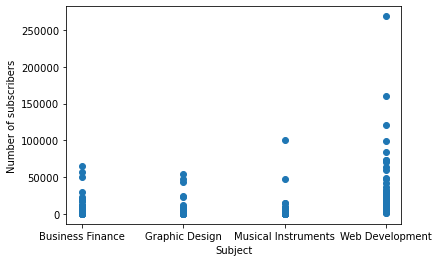

In [29]:
plt.scatter(df_free['subject'],df_free['num_subscribers'])
plt.ylabel('Number of subscribers')
plt.xlabel('Subject')
plt.show()

In [30]:
max_enrolled_in_free_courses = df_free['num_subscribers'].max()
max_enrolled_in_free_courses

268923

In [31]:
df_free[df_free['num_subscribers']==max_enrolled_in_free_courses]

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development


##### From the insights, it is clearly seen that the "Learn HTML5 Programming From Scratch" is the free course which has the highest number of enrolments of 268923. Also, from the previous insight in 1, it is clear that this course has the highest number of enrollments overall.

## 6. Which of the free courses are min enrolled?

In [32]:
min_enrolled_in_free_courses = df_free['num_subscribers'].min()
min_enrolled_in_free_courses

1

In [33]:
df_free[df_free['num_subscribers']==min_enrolled_in_free_courses]

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
968026,Learn to Play Tabla - The Indian drums,https://www.udemy.com/learn-to-play-tabla/,FALSE,Free,1,0,20,Beginner Level,1.5 hours,2017-07-04T21:04:11Z,Musical Instruments


##### From the above insight, it is clear that the "Learn to Play Tabla - The Indian drums" is the minimally enrolled course with only one subscriber.

## 7. Which of the 4 subjects in this dataset has maximum and minimum enrollments?

In [34]:
df_subjectwise = df_udemy.groupby(['subject'],as_index=False)['num_subscribers'].sum()
df_subjectwise = pd.DataFrame(df_subjectwise)
df_subjectwise

,subject,num_subscribers
0,Business Finance,1870747
1,Graphic Design,1063148
2,Musical Instruments,846689
3,Web Development,7980572


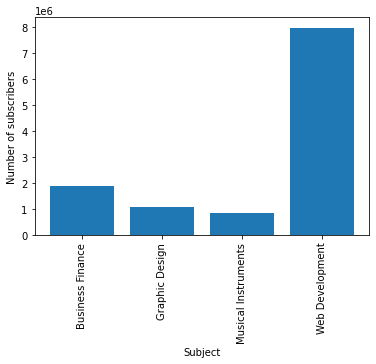

In [35]:
plt.bar(df_subjectwise['subject'],df_subjectwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers')
plt.xlabel('Subject')
plt.show()

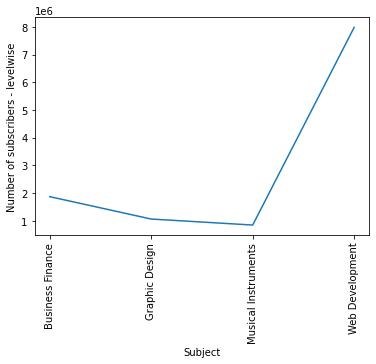

In [36]:
plt.plot(df_subjectwise['subject'],df_subjectwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers - levelwise')
plt.xlabel('Subject')
plt.show()

In [37]:
ms1 = df_subjectwise['num_subscribers'].max()
ms1

7980572

In [38]:
df_subjectwise[df_subjectwise['num_subscribers']==ms1]

,subject,num_subscribers
3,Web Development,7980572


In [39]:
ms2 = df_subjectwise['num_subscribers'].min()
ms2

846689

In [40]:
df_subjectwise[df_subjectwise['num_subscribers']==ms2]

,subject,num_subscribers
2,Musical Instruments,846689


##### From the above insight, it is clear that "Web Development" has the most number of subscribers with total of 7980572 subscribers. And, the minimum enrollments are for the subject "Musical Instruments" which has 846689 subscribers

## 8. Which subject has the most high and low enrollment in free courses?

In [41]:
df_subjectwise_paidornot = df_udemy.groupby(['subject','is_paid'],as_index=False)['num_subscribers'].sum()
df_subjectwise_paidornot = pd.DataFrame(df_subjectwise_paidornot)
df_subjectwise_paidornot

,subject,is_paid,num_subscribers
0,Business Finance,False,603228
1,Business Finance,True,1267519
2,Graphic Design,False,284821
3,Graphic Design,True,778327
4,Musical Instruments,FALSE,304735
5,Musical Instruments,TRUE,541954
6,Web Development,False,2382741
7,Web Development,True,5597831


In [42]:
df_notpaid_subjectwise = df_subjectwise_paidornot[(df_subjectwise_paidornot['is_paid']=='False') | (df_subjectwise_paidornot['is_paid']=='FALSE')]
df_notpaid_subjectwise

,subject,is_paid,num_subscribers
0,Business Finance,False,603228
2,Graphic Design,False,284821
4,Musical Instruments,FALSE,304735
6,Web Development,False,2382741


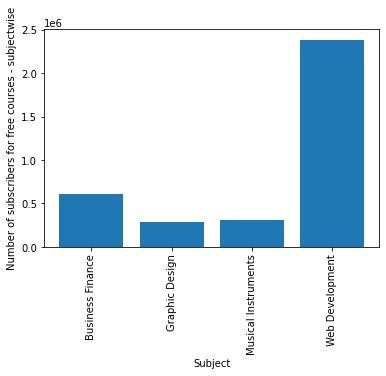

In [43]:
plt.bar(df_notpaid_subjectwise['subject'],df_notpaid_subjectwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers for free courses - subjectwise')
plt.xlabel('Subject')
plt.show()

In [44]:
msf1 = df_notpaid_subjectwise['num_subscribers'].max()
msf1

2382741

In [45]:
df_notpaid_subjectwise[df_notpaid_subjectwise['num_subscribers']==msf1]

,subject,is_paid,num_subscribers
6,Web Development,False,2382741


In [46]:
msf2 = df_notpaid_subjectwise['num_subscribers'].min()
msf2

284821

In [47]:
df_notpaid_subjectwise[df_notpaid_subjectwise['num_subscribers']==msf2]

,subject,is_paid,num_subscribers
2,Graphic Design,False,284821


##### It is clear from the above analysis that "Web Development" subject has most high enrolment for free courses with 2382741 subscribers. And, "Graphic Design" subject has low enrolment of free courses with 284821 subscribers.

## 9. Which subject has most high and low enrolment in paid courses?

In [48]:
df_paid_subjectwise = df_subjectwise_paidornot[(df_subjectwise_paidornot['is_paid']=='True') | (df_subjectwise_paidornot['is_paid']=='TRUE')]
df_paid_subjectwise

,subject,is_paid,num_subscribers
1,Business Finance,True,1267519
3,Graphic Design,True,778327
5,Musical Instruments,TRUE,541954
7,Web Development,True,5597831


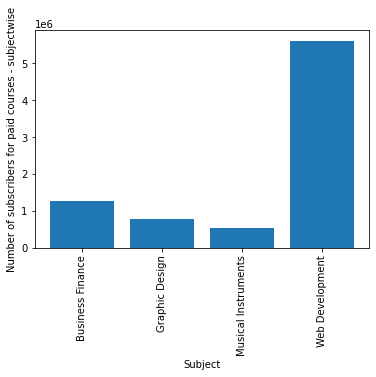

In [49]:
plt.bar(df_paid_subjectwise['subject'],df_paid_subjectwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers for paid courses - subjectwise')
plt.xlabel('Subject')
plt.show()

In [50]:
msp1 = df_paid_subjectwise['num_subscribers'].max()
msp1

5597831

In [51]:
df_paid_subjectwise[df_paid_subjectwise['num_subscribers']==msp1]

,subject,is_paid,num_subscribers
7,Web Development,True,5597831


In [52]:
msp2 = df_paid_subjectwise['num_subscribers'].min()
msp2

541954

In [53]:
df_paid_subjectwise[df_paid_subjectwise['num_subscribers']==msp2]

,subject,is_paid,num_subscribers
5,Musical Instruments,TRUE,541954


##### From the analytics, it is clear that "Web Development" subject has high enrolment of paid courses with 5597831 subscribers. And, the 'Musical Instruments' subject has low number of enrolment for paid courses with 541954 subscribers.

## 10. Which level courses has maximum users and minimum users subscribed?

In [54]:
df_levelwise = df_udemy.groupby(['level'],as_index=False)['num_subscribers'].sum()
df_levelwise = pd.DataFrame(df_levelwise)

In [55]:
df_levelwise

,level,num_subscribers
0,All Levels,6916112
1,Beginner Level,4052843
2,Expert Level,50196
3,Intermediate Level,742005


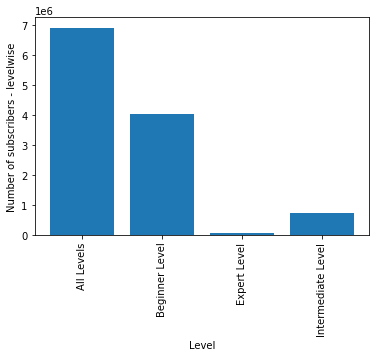

In [56]:
plt.bar(df_levelwise['level'],df_levelwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers - levelwise')
plt.xlabel('Level')
plt.show()

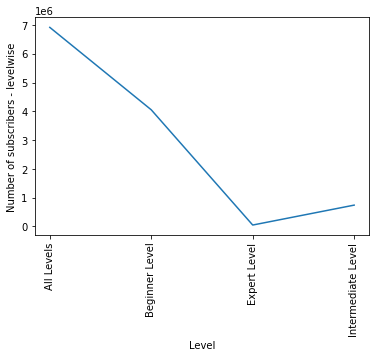

In [57]:
plt.plot(df_levelwise['level'],df_levelwise['num_subscribers'])
plt.xticks(rotation=90)
plt.ylabel('Number of subscribers - levelwise')
plt.xlabel('Level')
plt.show()

In [58]:
ml1 = df_levelwise['num_subscribers'].max()

In [59]:
df_levelwise[df_levelwise['num_subscribers']==ml1]

,level,num_subscribers
0,All Levels,6916112


In [60]:
ml2 = df_levelwise['num_subscribers'].min()
ml2

50196

In [61]:
df_levelwise[df_levelwise['num_subscribers']==ml2]

,level,num_subscribers
2,Expert Level,50196


##### The maximum users have, thus, subscribed to the "All levels" category courses with 50196 number of users enrolled.

###### The "Expert level" courses has minimum number of subscribers with 50196 users enrolled.

## 11. Which course has been created but they have no content?

In [62]:
min_hrs = df_udemy['content_duration'].min()
min_hrs

'0'

In [63]:
min_hr_course = df_udemy[df_udemy['content_duration']==min_hrs]
min_hr_course

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
course_id,,,,,,,,,,,
627332,Mutual Funds for Investors in Retirement Accounts,https://www.udemy.com/mutual-funds-for-investo...,True,20,0,0,0,All Levels,0,2015-12-17T05:38:38Z,Business Finance


##### The "Mutual Funds for Investors in Retirement Accounts" course has been created but has no course content.

## 12. What does the users choose among paid and free courses?

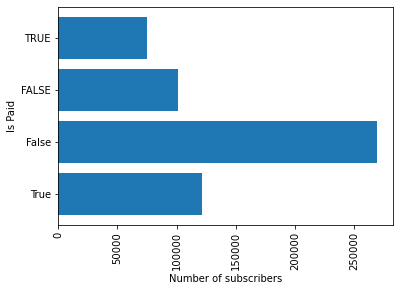

In [64]:
plt.barh(df_udemy['is_paid'],df_udemy['num_subscribers'])
plt.xticks(rotation=90)
plt.xlabel('Number of subscribers')
plt.ylabel('Is Paid')
plt.show()

##### The above insight shows that the False value has the highest number of subscribers where the False represents that the courses are not paid. 

##### From the above insight, it is clear that the large number of users choose courses that are free more than the paid courses. This is also a good choice since there are large number of free courses which are of high quality and rich content.

## CONCLUSION:
  From the analysis made in this project, it is clear that "Web development" sector is on high demand and is the most learned online course on the Udemy platform irrespective of paid or free.
  
  
  It is also found that the users prefer courses that are free and are of normal level("All level") courses among all other categories.

### Thank you : )